In [1]:
%tensorflow_version 1.x
import sys
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/nn/conv')
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/preprocessing')
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/datasets')
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imagetoarraypreprocessor import ImageToArrayPreprocessor
from aspectawarepreprocessor import AspectAwarePreprocessor
from simplepreprocessor import SimplePreprocessor
from simpledatasetloader import SimpleDatasetLoader
from minivggnet import MiniVGGNet
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
print("[INFO] loading images...")
%cd /content/drive/My\ Drive/Colab_Work
imagePaths = list(paths.list_images('flowers17'))
classNames = [pt.split(os.path.sep)[-2]for pt in imagePaths]
classNames = [str(x) for x in np.unique(classNames)]

[INFO] loading images...
/content/drive/My Drive/Colab_Work


In [3]:
aap = AspectAwarePreprocessor(64, 64)
iap = ImageToArrayPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[aap, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float")/255.0

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25,  random_state=42)

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

[INFO] processed 500/1360
[INFO] processed 1000/1360


In [4]:
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = MiniVGGNet.build(width=64, height=64, depth=3, classes=len(classNames))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [5]:
print("[INFO] training network...")
H = model.fit(trainX,  trainY, validation_data=(testX, testY), batch_size=32, epochs=100, verbose=1)

[INFO] training network...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1020 samples, validate on 340 samples
Epoch 1/100
1020/1020 [==============================] - 8s 8ms/step - loss: 3.2741 - acc: 0.1804 - val_loss: 2.1353 - val_acc: 0.3882
Epoch 2/100
1020/1020 [==============================] - 1s 493us/step - loss: 2.0842 - acc: 0.3863 - val_loss: 2.0163 - val_acc: 0.3500
Epoch 3/100
1020/1020 [==============================] - 0s 484us/step - loss: 1.6685 - acc: 0.5176 - val_loss: 1.6044 - val_acc: 0.5118
Epoch 4/100
1020/1020 [==============================] - 1s 514us/step - loss: 1.3819 - acc: 0.5529 - val_loss: 1.7147 - val_acc: 0.4500
Epoch 5/100
1020/1020 [==============================] - 1s 493us/step - loss: 1.1226 - acc: 0.6333 - val_loss: 1.4272 - val_acc: 0.5765
Epoch 6/100
1020/1020 [==============================] - 1s 495us/step - loss: 0.9451 - acc: 0.6804 - val_loss: 1.8444 - val_acc: 0.4853
Epoch 7/10

In [6]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=classNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    bluebell       0.72      0.62      0.67        21
   buttercup       0.65      0.55      0.59        20
  colts_foot       0.47      0.40      0.43        20
     cowslip       0.33      0.45      0.38        20
      crocus       0.32      0.40      0.35        15
    daffodil       0.50      0.30      0.38        23
       daisy       1.00      0.78      0.88        27
   dandelion       0.44      0.84      0.58        19
  fritillary       0.69      0.47      0.56        19
        iris       0.63      0.75      0.69        16
 lily_valley       0.60      0.75      0.67        16
       pansy       0.62      0.56      0.59        18
    snowdrop       0.58      0.55      0.56        20
   sunflower       0.95      0.82      0.88        22
   tigerlily       0.95      0.78      0.86        23
       tulip       0.35      0.50      0.41        18
  windflower       0.75      0.65      0.70        2

/content/drive/My Drive/Colab_Work


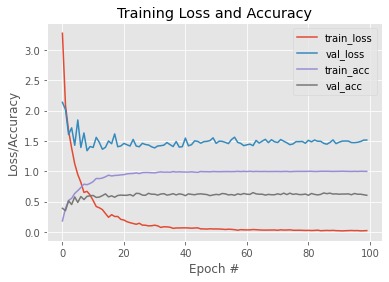

In [7]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
%cd /content/drive/My\ Drive/Colab_Work
plt.savefig('minivggnet_flowers17_baseline_train_test_plot.png')